In [1]:
import pandas as pd
import numpy as np

C:\Users\91968\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from pycaret.classification import *

In [3]:
heart_disease_df = pd.read_csv('cardio_train.csv', sep =';')

In [4]:
heart_disease_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
heart_disease_df = heart_disease_df.drop(['id'], axis=1)


In [6]:
hd_data = heart_disease_df.sample(frac=0.7, random_state=786).reset_index(drop=True)
hd_data_unseen = heart_disease_df.drop(hd_data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(hd_data.shape))
print('Unseen Data For Predictions: ' + str(hd_data_unseen.shape))

Data for Modeling: (49000, 12)
Unseen Data For Predictions: (21000, 12)


<Axes: >

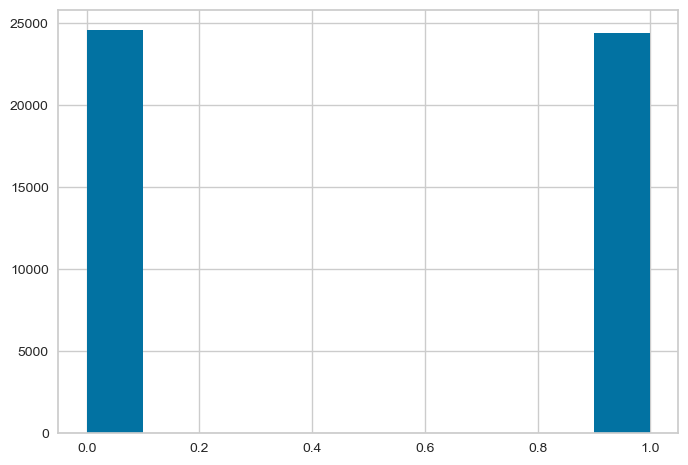

In [7]:
hd_data['cardio'].hist()

In [8]:
heartDisease_clf = setup(data = hd_data, target = 'cardio', session_id=42) 

,Description,Value
0,Session id,42
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(49000, 12)"
4,Transformed data shape,"(49000, 12)"
5,Transformed train set shape,"(34300, 12)"
6,Transformed test set shape,"(14700, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [9]:
%%time
hf_models =compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7372,0.8029,0.6937,0.7580,0.7244,0.4742,0.4760,0.9720
catboost,CatBoost Classifier,0.7364,0.8016,0.6926,0.7573,0.7235,0.4726,0.4744,8.1730
lightgbm,Light Gradient Boosting Machine,0.7344,0.8010,0.6883,0.7563,0.7207,0.4686,0.4705,0.2830
ada,Ada Boost Classifier,0.7311,0.7957,0.6568,0.7696,0.7087,0.4619,0.4670,0.3810
lr,Logistic Regression,0.7184,0.7765,0.6742,0.7376,0.7044,0.4365,0.4382,2.4000
rf,Random Forest Classifier,0.7168,0.7764,0.6985,0.7232,0.7106,0.4335,0.4338,1.4210
et,Extra Trees Classifier,0.7050,0.7620,0.6990,0.7057,0.7023,0.4100,0.4101,1.1670
knn,K Neighbors Classifier,0.6762,0.7219,0.6544,0.6824,0.6680,0.3524,0.3527,0.2150
ridge,Ridge Classifier,0.6497,0.0000,0.6072,0.6614,0.6331,0.2990,0.3001,0.0470
lda,Linear Discriminant Analysis,0.6497,0.7073,0.6072,0.6614,0.6331,0.2991,0.3001,0.0570


CPU times: total: 13 s
Wall time: 2min 50s


In [10]:
print(hf_models)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), <catboost.core.CatBoostClassifier object at 0x000001BC0811DDD0>, LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
     

In [12]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7402,0.8040,0.6885,0.7661,0.7253,0.4802,0.4827
1,0.7373,0.7965,0.6844,0.7636,0.7218,0.4744,0.4770
2,0.7347,0.8050,0.7026,0.7491,0.7251,0.4692,0.4701
3,0.7458,0.8108,0.7002,0.7686,0.7328,0.4914,0.4933
4,0.7364,0.7979,0.6944,0.7564,0.7241,0.4727,0.4743
5,0.7397,0.8132,0.6868,0.7662,0.7243,0.4791,0.4816
6,0.7431,0.8069,0.7096,0.7589,0.7334,0.4862,0.4872
7,0.7341,0.7967,0.6948,0.7521,0.7223,0.4680,0.4694
8,0.7362,0.8015,0.6995,0.7528,0.7252,0.4721,0.4733


In [14]:
tuned_gbc =  tune_model(gbc);
final_gbc= finalize_model(tuned_gbc)
final_gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7417,0.8058,0.6903,0.7676,0.7269,0.4832,0.4856
1,0.7327,0.7960,0.6710,0.7635,0.7142,0.4650,0.4685
2,0.7376,0.8048,0.6956,0.7577,0.7253,0.4750,0.4766
3,0.7446,0.8109,0.6967,0.7687,0.7310,0.4890,0.4912
4,0.7321,0.7979,0.6844,0.7547,0.7178,0.4639,0.4659
5,0.7370,0.8113,0.6833,0.7637,0.7213,0.4738,0.4765
6,0.7402,0.8076,0.7032,0.7577,0.7294,0.4803,0.4815
7,0.7341,0.7980,0.6907,0.7543,0.7211,0.4680,0.4697
8,0.7373,0.8017,0.6960,0.7567,0.7251,0.4744,0.4760


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'gender', 'height',
                                             'weight', 'ap_hi', 'ap_lo',
                                             'cholesterol', 'gluc', 'smoke',
                                             'alco', 'active'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorica...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=42, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

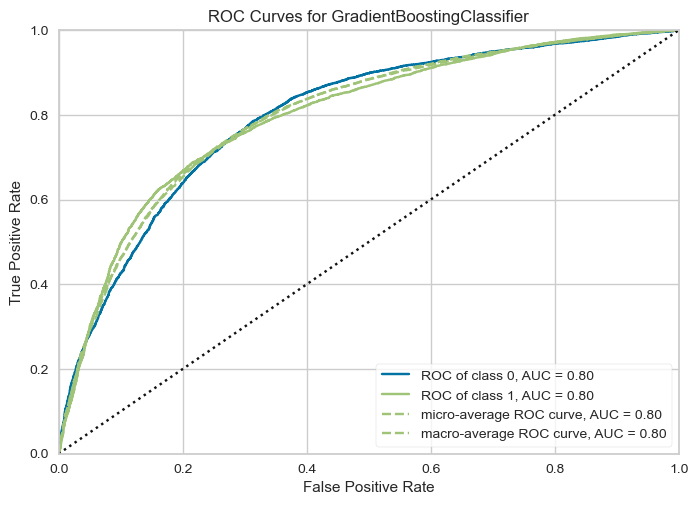

In [15]:
plot_model(hf_models[0], plot = 'auc')

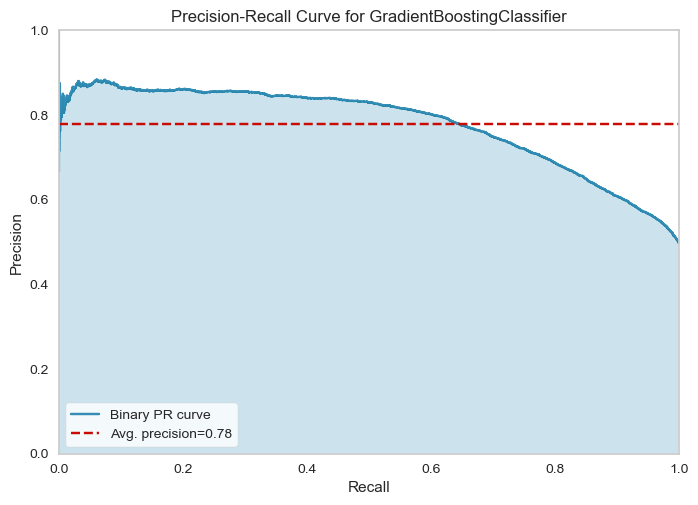

In [16]:
plot_model(hf_models[0], plot = 'pr')

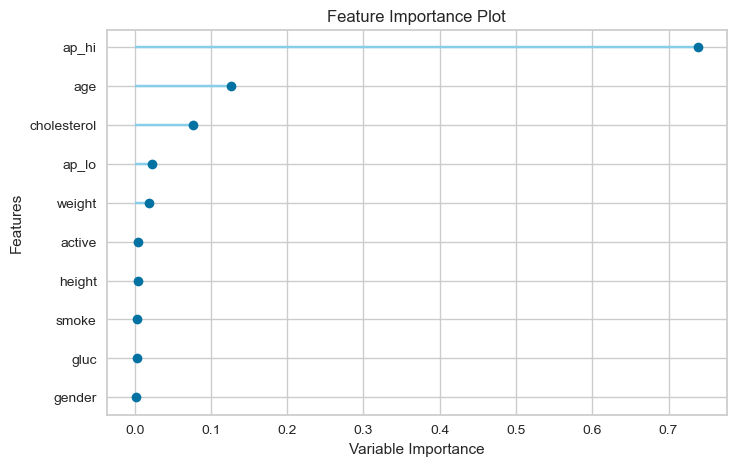

In [17]:
plot_model(hf_models[0], plot='feature')

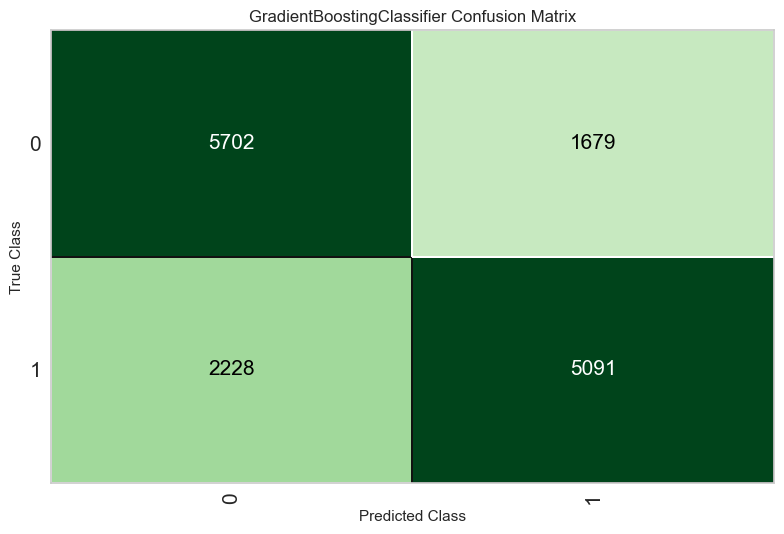

In [19]:
plot_model(hf_models[0], plot = 'confusion_matrix')

In [20]:
predict_model(hf_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7342,0.7981,0.6956,0.7520,0.7227,0.4683,0.4696


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,prediction_label,prediction_score
41248,23499,1,157,92.0,140,90,3,1,0,0,1,1,1,0.8712
25745,15285,2,176,104.0,110,70,1,1,0,0,1,0,0,0.8255
13816,16630,1,165,75.0,100,60,1,1,0,0,1,0,0,0.8555
28006,18896,2,171,80.0,120,80,1,1,0,0,1,0,0,0.6981
38323,23391,1,155,66.0,130,80,1,1,0,0,1,1,1,0.6435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,19069,1,165,67.0,150,100,1,1,0,0,0,1,1,0.8686
8559,15532,1,170,65.0,120,80,1,1,0,0,0,0,0,0.7921
29952,19593,1,162,67.0,130,80,2,1,0,0,0,1,1,0.6312
4419,15332,1,174,79.0,120,70,1,1,0,0,1,0,0,0.8226


In [22]:
unseen_predictions = predict_model(hf_models[0], data=hd_data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7365,0.8040,0.6938,0.7591,0.7250,0.4730,0.4748


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,prediction_label,prediction_score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.6937
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8805
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8483
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8816
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.5780


In [23]:
final_GradientBoostingClassifier = finalize_model(hf_models[0])

In [24]:
unseen_predictions = predict_model(final_GradientBoostingClassifier, data=hd_data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7379,0.8049,0.6984,0.7588,0.7273,0.4758,0.4773


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,prediction_label,prediction_score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.7130
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8816
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8559
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8723
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.5981


In [25]:
save_model(final_GradientBoostingClassifier,'Final GBC Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'gender', 'height',
                                              'weight', 'ap_hi', 'ap_lo',
                                              'cholesterol', 'gluc', 'smoke',
                                              'alco', 'active'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorica...
                                             criterio

In [26]:
saved_final_GBC = load_model('Final GBC Model')

Transformation Pipeline and Model Successfully Loaded


In [27]:
new_prediction = predict_model(saved_final_GBC, data=hd_data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7379,0.8049,0.6984,0.7588,0.7273,0.4758,0.4773


In [28]:
new_prediction.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,prediction_label,prediction_score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.7130
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8816
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8559
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8723
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.5981
